# Chain of coupled Hydrogen-like atoms
## 0. Prerequisites

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import tb

## 1. Adding new species

Let us define two atoms, called A and B, each has a silgle $s$ orbital and diffrrent energies -1 eV and -0.7 eV.

In [2]:
a = tb.Orbitals('A')
a.add_orbital(title='s', energy=-1, )
b = tb.Orbitals('B')
b.add_orbital(title='s', energy=-0.7, )

Now we define a set of of orbitals for tight-binding computations registring created atoms:

In [3]:
tb.Orbitals.orbital_sets = {'A': a, 'B': b}

The geometrical parameters of the system are specified by a xyz-file:

In [4]:
xyz_file="""2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000
"""

Now one needs to specify the coupling parameters between pairs of atoms with a given diatomic symmetry:

In [5]:
tb.set_tb_params(PARAMS_A_B={'ss_sigma': 0.3})

## 2. Computing Hamiltonian matrix elments
At this point the hamiltonian matrix can be computed and visualized:

In [10]:
h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.1)
h.initialize()

The verbosity level is 2
The radius of the neighbourhood is 1.1 Ang

---------------------------------

The xyz-file:
 2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000

---------------------------------

Basis set 
 Num of species {'A': 1, 'B': 1} 


 A 
title | energy | m | l | n | s
------+--------+---+---+---+--
s     | -1     | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 

 B 
title | energy | m | l | n | s
------+--------+---+---+---+--
s     | -0.7   | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 
---------------------------------

Radial dependence function: None

---------------------------------



[[-1. +0.j  0.3+0.j]
 [ 0.3+0.j -0.7+0.j]]


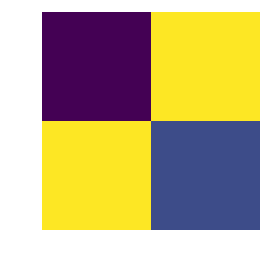

In [11]:
plt.axis('off')
plt.imshow(np.real(h.h_matrix))
print(h.h_matrix)

## 3. Band structure computation and visualization

Let us specify periodic bondary conditions. Below, assume that system is translated in along axis z:

In [7]:
PRIMITIVE_CELL = [[0, 0, 2.0]]
h.set_periodic_bc(PRIMITIVE_CELL)

Primitive_cell_vectors: 
 [[0, 0, 2.0]] 

Virtual and interfacial atoms: 
 Label              Coordinates     
0_A1               [0. 0. 0.]      
*_0_0_A1           [0. 0. 2.]      
**_1_0_A1          [0. 0. 4.]      
*_2_0_A1           [ 0.  0. -2.]   
**_3_0_A1          [ 0.  0. -4.]   
1_B1               [0. 0. 1.]      
*_4_1_B1           [0. 0. 3.]      
**_5_1_B1          [0. 0. 5.]      
*_6_1_B1           [ 0.  0. -1.]   
**_7_1_B1          [ 0.  0. -3.]   
 
---------------------------------



Now we determine a set of k-points where we want to compute band structure.

In [8]:
num_points = 20
kk = np.linspace(0, 3.14/2, num_points, endpoint=True)

The band structure computations are performed below for each k-point:

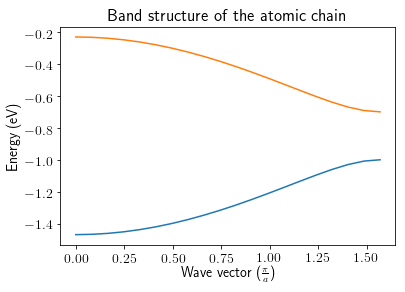

In [9]:
band_sructure = []

for jj in range(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=14)
ax = plt.axes()
ax.set_title('Band structure of the atomic chain')
ax.set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax.set_ylabel(r'Energy (eV)')
ax.plot(kk, np.sort(np.real(band_sructure)))
plt.show()